## PLOT maps and make movies of DREAM model output (some examples)
* Purpose: demonstrate how to read some DREAM model output (here temperature at 500 hPa) and plot maps for a series of time steps (and make a movie out of them).
* stephanie leroux 
* last update: 16/01/19
* for questions/requests/comments please use the git pull-request and issues functions above.
* (...)

==============================================================================================================================
### Python module requirements for this notebook:
* numpy
* xarray
* cartopy
* matplotlib
* note that the notebook also import a custom library ```utils_SLX_plots ``` that you
ll also find in this directory.

==============================================================================================================================

# - Imports

In [10]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr
    
# plot
import cartopy.crs as ccrs
import cartopy.feature as ccf
import cartopy.util as ccu
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# My custom module with plot tools
import utils_SLX_plots as slx


# if using jupyter notebook
%matplotlib inline 

=====================================================================================================

# - Read DREAM model output:

* Set parameters:

In [3]:
### local directory of input files (on my laptop)
diri = "/Users/leroux/DATA/DREAM_DATA/MJO_DREAMdata/"

# name of the config exp.
CONFIGNAME = "linear_restingBS_mid-pac"
#CONFIGNAME = "nonlin_DJF3dBS_MJOcycle"

# innput file
fili = CONFIGNAME+".nc"

* Read data (with xarray):

In [4]:
#read temperature
air = xr.open_dataset(diri+fili,decode_times=True)['air']
air


# keep time index:
time=air.time.to_index()

#### Examples of how to select data and make quick and dirty plots (no projection, no continents, etc):

* Select one time step from time indices and plot (quick and dirty):

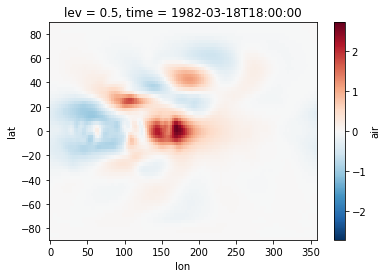

In [26]:
subset1 = air.isel(time=50,lev=0)
subset1.plot()

* Select all timesteps at one grid point and plot timeseries (quick and dirty)

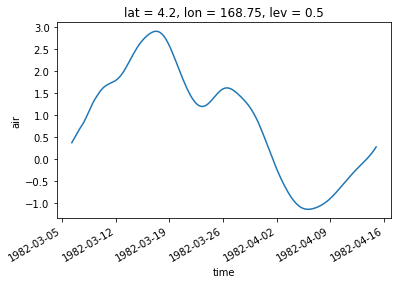

In [27]:
subset2 = air.sel(lev=0,lat=3.,lon=170.,method='nearest')
subset2.plot()

=====================================================================================================
# - Plot a set of maps:

* The code below loops on all the timesteps and plot a map each timestep (could also be one map every day (every 4 timesteps))


In [ ]:
#----------------------------------------------------
#------ PLOT PARAMETERS------------------------------
#----------------------------------------------------

# type of plot (can be 'contourf', 'pcolormesh' or 'scatter', defaut is contourf)
typlo='contourf'

# set coastL to True if you want coaslines
coastL=False

# colormap
cm_base=slx.make_NCLcolormap()

# min/max values

#linear-resting bs case
vmin=-7.5
vmax=7.5

#linear-mjo-forcing case
#vmin=-4
#vmax=4

# number of color segments of the colormap
Nincr=50

# colorbar label 
labelplt= "500 hPa Temperature ("+air.units+")"

# number of labels on the colorbar
Nbar=7

# plot format
pltty = ".png"

# plot resolution (dpi)
dpifig=200

# base name for output plot file
plti="T500_"+CONFIGNAME

# output directory for plots
diro="./"


#----------------------------------------------------
#------ LOOP ON TIMESTEP ----------------------------
#----------------------------------------------------
ipcount=0
for it in range(0,time.size):
#for it in range(0,30):
    
    #if (time.hour[it]==0):
        
        # output plot file name including the time index
        plto = plti+"."+str(it+100)

        # data to plot (must be a 2-d np.array)
        # here we select one timestep at a time for plotting purposes
        data2plot  = air.isel(time=it,lev=0).values

        # make the data to plot cyclic so that the values at longitude 0 are repeated at 360. (for plot purposes)
        cyclic_data, cyclic_lons = ccu.add_cyclic_point(data2plot, coord=air.lon.values)

        #----------------------------------------------------
        #------ PLOT ----------------------------------------
        #----------------------------------------------------

        # create fig
        fig1 = plt.figure(figsize=([13,10]),facecolor='white')

        # plot data (base plot from plotmap functionn defined above)
        cs = slx.plotmap(fig1,cyclic_data,cyclic_lons,air.lat.values,cm_base,plto,vmin=vmin,vmax=vmax,Nincr=Nincr,glo=True,coastL=coastL,coastC=False,su='#EFF5FB',so='#F8E0E0',loncentr=180.,typlo=typlo,Nbar=Nbar,labelplt=labelplt)

        # add title on plot (date)
        plt.title(slx.printdatestring(time,it))

        # Save fig in png, resolution dpi
        fig1.savefig(diro+"/"+plto+'.png', facecolor=fig1.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#

        # close fig
        plt.close(fig1)       

=====================================================================================================
# - Just as an alternative example :
This is a plot with ```pcolormesh``` instead of ```contourf```. ```pcolormesh``` does not interpolate (the plot is at the grid resolution):

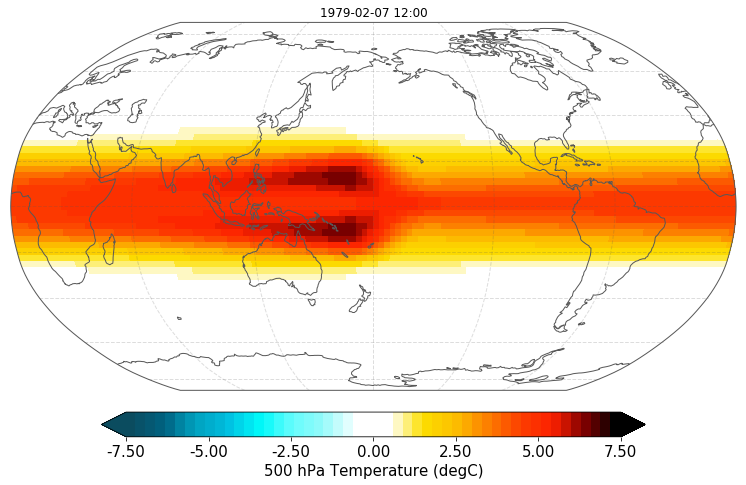

In [9]:
#----------------------------------------------------
#------ PLOT PARAMETERS------------------------------
#----------------------------------------------------

# type of plot (pcolormesh: True/False  if false then contourf is used. Default is False.)
typlo='pcolormesh'

# set coastL to True if you want coaslines
coastL=True

# colormap
cm_base=slx.make_NCLcolormap()

# min/max values

#linear-resting bs case
vmin=-7.5
vmax=7.5

#linear-mjo-forcing case
#vmin=-4
#vmax=4

# number of color segments of the colormap
Nincr=50

# colorbar label 
labelplt= "500 hPa Temperature ("+air.units+")"

# number of labels on the colorbar
Nbar=7

# plot format
pltty = ".png"

# plot resolution (dpi)
dpifig=200

# base name for output plot file
plti="GRID_T500_"+CONFIGNAME

# output directory for plots
diro="./"


#----------------------------------------------------
#------ LOOP ON TIMESTEP ----------------------------
#----------------------------------------------------
ipcount=0

it = 150


# output plot file name including the time index
plto = plti+"."+str(it+100)

# data to plot (must be a 2-d np.array)
# here we select one timestep at a time for plotting purposes
data2plot  = air.isel(time=it,lev=0).values

# make the data to plot cyclic so that the values at longitude 0 are repeated at 360. (for plot purposes)
cyclic_data, cyclic_lons = ccu.add_cyclic_point(data2plot, coord=air.lon.values)

#----------------------------------------------------
#------ PLOT ----------------------------------------
#----------------------------------------------------

# create fig
fig2 = plt.figure(figsize=([13,10]),facecolor='white')

# plot data (base plot from plotmap functionn defined above)
cs = slx.plotmap(fig2,cyclic_data,cyclic_lons,air.lat.values,cm_base,plto,vmin=vmin,vmax=vmax,Nincr=Nincr,glo=True,coastL=coastL,coastC=False,su='#EFF5FB',so='#F8E0E0',loncentr=180.,typlo=typlo,Nbar=Nbar,labelplt=labelplt)

# add title on plot (date)
plt.title(slx.printdatestring(time,it))

plt.show()

# Save fig in png, resolution dpi
fig2.savefig(diro+"/"+plto+'.png', facecolor=fig2.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#

# close fig
plt.close(fig2)       

=====================================================================================================
# - To make a movie from a set of png images:
* you need to install ffmpeg (on a mac you can install it via homebrew if you use homebrew). 

For example: 

```brew install ffmpeg --with-fdk-aac --with-ffplay --with-freetype --with-frei0r --with-libass --with-libvo-aacenc --with-libvorbis --with-libvpx --with-opencore-amr --with-openjpeg --with-opus --with-rtmpdump --with-schroedinger --with-speex --with-theora --with-tools ```

* Then get Laurent Brodeau's script  images2mp4.sh (which is based on ffmpeg):

```git clone  https://github.com/brodeau/climporn.git```

* Run Laurent's script in the directory where is stored your set of png images. For example:

```~/WORK/UTILS/climporn/ffmpeg/images2mp4.sh -i T500_nonlin_DJF3dBS_MJOcycle  -h 488 -f 30```

* To read the doc about the different options of this script, just run:

```~/WORK/UTILS/climporn/ffmpeg/images2mp4.sh```